In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/loanprediction/test_lAUu6dG.csv
/kaggle/input/loanprediction/train_ctrUa4K.csv


In [2]:
# import the modules we'll need
from IPython.display import HTML
import base64

# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv(index = False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [3]:

test = pd.read_csv("../input/loanprediction/test_lAUu6dG.csv")
train = pd.read_csv("../input/loanprediction/train_ctrUa4K.csv")

**1. Understanding Data**

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


1.1 Univariate Analysis

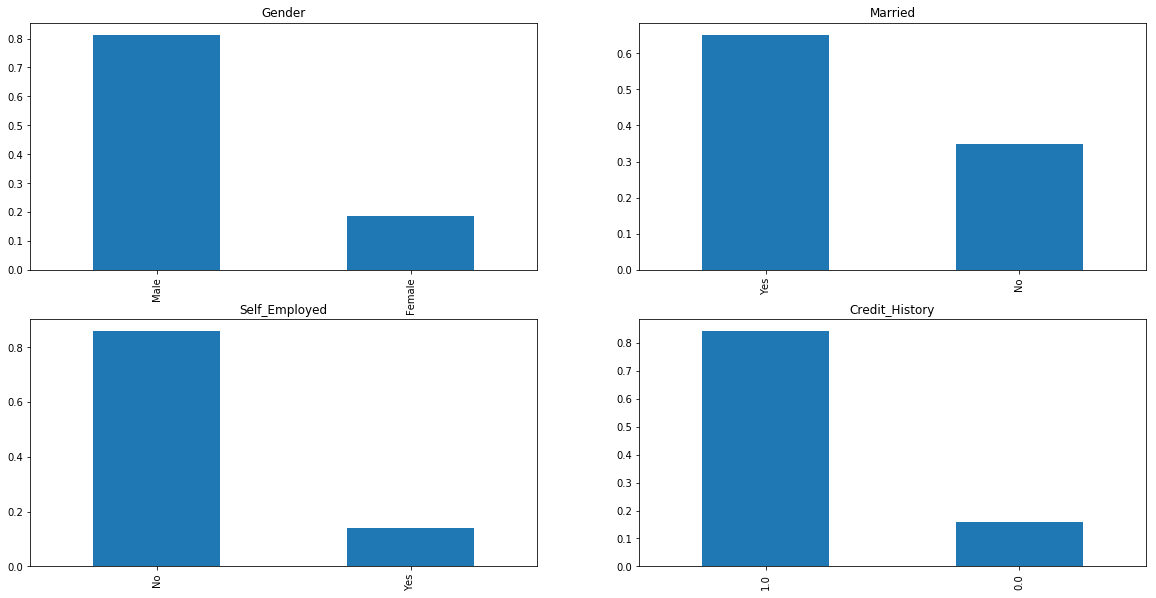

In [5]:
#Catergorical Variables
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

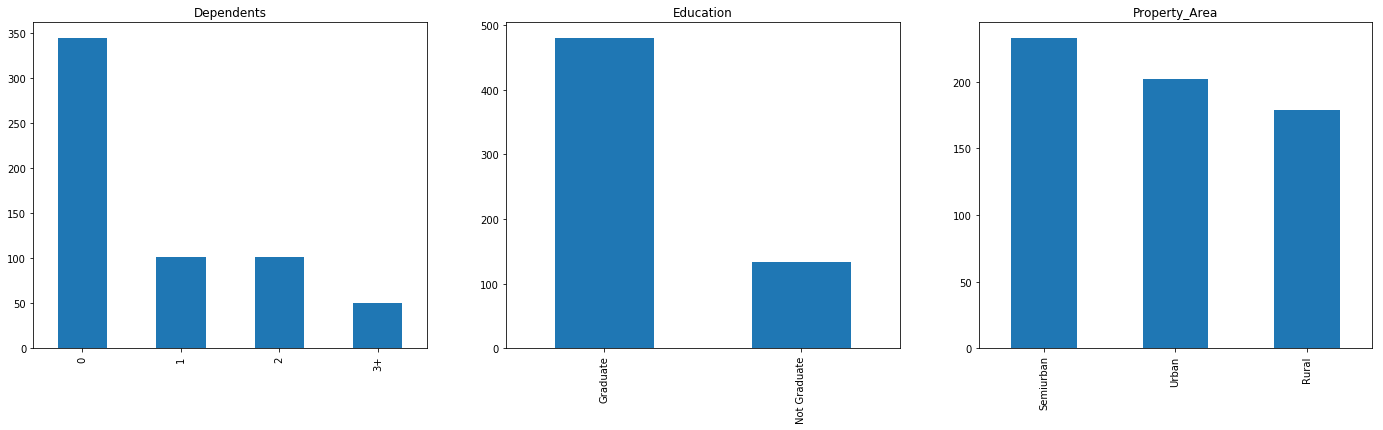

In [6]:
#Ordinal Variables
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts().plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132)
train['Education'].value_counts().plot.bar(figsize=(24,6), title= 'Education') 
plt.subplot(133)
train['Property_Area'].value_counts().plot.bar(figsize=(24,6), title= 'Property_Area') 

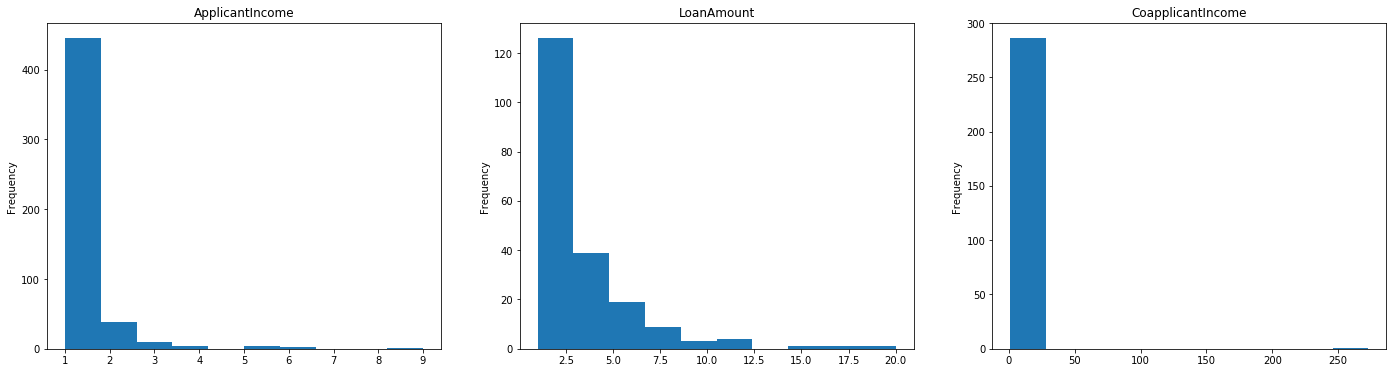

In [7]:
#Quantitative Variables
plt.figure(1)
plt.subplot(131)
train['ApplicantIncome'].value_counts().plot.hist(figsize=(24,6), title= 'ApplicantIncome') 
plt.subplot(132)
train['LoanAmount'].value_counts().plot.hist(figsize=(24,6), title= 'LoanAmount') 
plt.subplot(133)
train['CoapplicantIncome'].value_counts().plot.hist(figsize=(24,6), title= 'CoapplicantIncome') 

1.2 Bivariate Analysis 

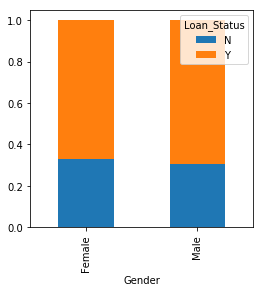

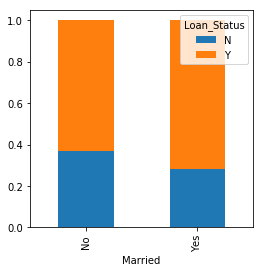

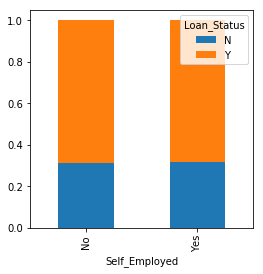

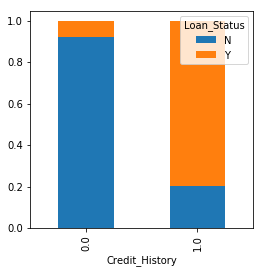

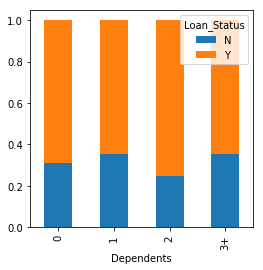

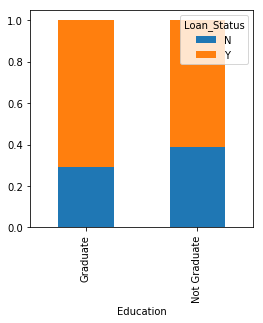

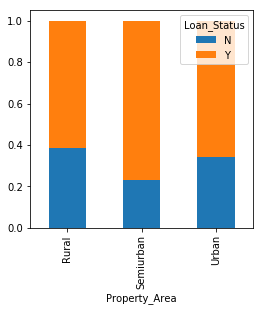

In [8]:
#Catergorical Variables 
cat_var = ['Gender','Married','Self_Employed','Credit_History','Dependents','Education','Property_Area']
for col in cat_var:
    Gender=pd.crosstab(train[col],train['Loan_Status']) 
    Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
    plt.show()

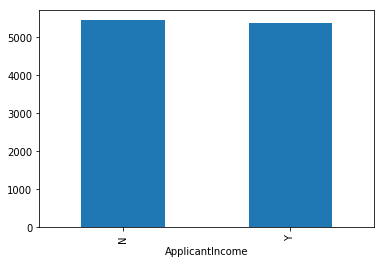

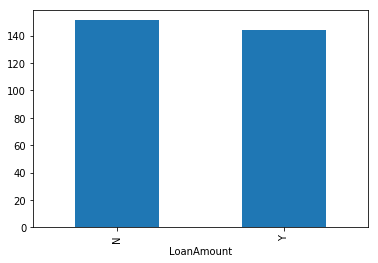

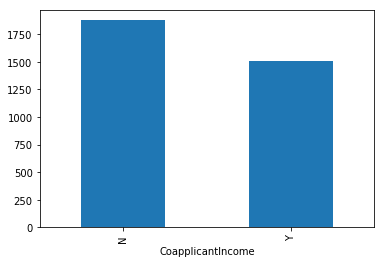

In [9]:
quant_arr = ['ApplicantIncome','LoanAmount','CoapplicantIncome']
for col in quant_arr:
    train.groupby('Loan_Status')[col].mean().plot.bar()
    plt.xlabel(col)
    plt.show()

In [10]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [11]:
def survival_stacked_bar(variable):
    approved=train[train["Loan_Status"]==1][variable].value_counts()/len(train["Loan_Status"]==1)
    NotApproved=train[train["Loan_Status"]==0][variable].value_counts()/len(train["Loan_Status"]==0)
    data=pd.DataFrame([approved,NotApproved])
    data.index=["Approved","NotApproved"]
    data.plot(kind="bar",stacked=True,title="Percentage")
    return data.head()

**2. Data Cleaning and Processing **

2. 1 Dealing with missing Data

In [12]:
missing_data = train.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Loan_ID
False    614
Name: Loan_ID, dtype: int64

Gender
False    601
True      13
Name: Gender, dtype: int64

Married
False    611
True       3
Name: Married, dtype: int64

Dependents
False    599
True      15
Name: Dependents, dtype: int64

Education
False    614
Name: Education, dtype: int64

Self_Employed
False    582
True      32
Name: Self_Employed, dtype: int64

ApplicantIncome
False    614
Name: ApplicantIncome, dtype: int64

CoapplicantIncome
False    614
Name: CoapplicantIncome, dtype: int64

LoanAmount
False    592
True      22
Name: LoanAmount, dtype: int64

Loan_Amount_Term
False    600
True      14
Name: Loan_Amount_Term, dtype: int64

Credit_History
False    564
True      50
Name: Credit_History, dtype: int64

Property_Area
False    614
Name: Property_Area, dtype: int64

Loan_Status
False    614
Name: Loan_Status, dtype: int64



In [13]:
def replceWithMode(array,data):
    for col in array: 
        data[col].replace(np.nan,data[col].mode()[0],inplace = True)
mode_array = ['Self_Employed','Dependents','Credit_History','Loan_Amount_Term','Married','Gender']
replceWithMode(mode_array,train)
replceWithMode(mode_array,test)

train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

2.2 Treating Outliers

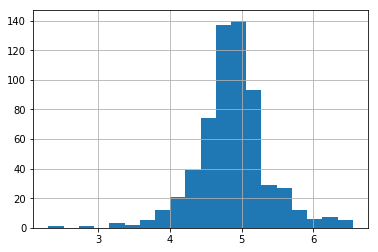

In [14]:
train['LoanAmount_log'] = np.log(train['LoanAmount']+1) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount']+1)

**3. Feature Engineering**

In [15]:
train["Loan_Amount_Term"] = train["Loan_Amount_Term"]/12
test["Loan_Amount_Term"] = test["Loan_Amount_Term"]/12

In [16]:
#Creating total income with applicants income and coapplicants income 
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome'] 
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

train['Total_Income_log'] = np.log(train['Total_Income']+1)
test['Total_Income_log'] = np.log(test['Total_Income']+1)

In [17]:
train['LoanAmount_log'] = np.log(train['LoanAmount']*1000+1)
test['LoanAmount_log'] = np.log(test['LoanAmount']*1000+1)

In [18]:
#Creating EMI
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term'] 


In [19]:
train['EMI']

0      4.266667
1      4.266667
2      2.200000
3      4.000000
4      4.700000
         ...   
609    2.366667
610    2.666667
611    8.433333
612    6.233333
613    4.433333
Name: EMI, Length: 614, dtype: float64

In [20]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) 
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

In [21]:
#train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
#test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

**4. Dealing with Categorical Data**

In [22]:
#Binary Data
loan_map = {'Y':1,'N':0}
train['Loan_Status'] = train['Loan_Status'].map(loan_map)

In [23]:
train[['Loan_Status']] = train[['Loan_Status']].apply(pd.to_numeric)
train['Dependents'].replace('3+',3,inplace = True)
test['Dependents'].replace('3+',3,inplace = True)
train[['Dependents']] = train[['Dependents']].apply(pd.to_numeric)
test[['Dependents']] = test[['Dependents']].apply(pd.to_numeric)

In [24]:
X = train.drop(["Loan_Status"],axis=1)
X = X.drop(["Loan_ID"],axis=1)

#X = pd.get_dummies(X)
colnames = ['Gender','Married','Education','Self_Employed','Property_Area']
for col in colnames:
    X[col] = pd.factorize(X[col])[0]
y = train[['Loan_Status']]

In [25]:
X_test_data = test.drop(["Loan_ID"],axis=1)
test_colnames = ['Gender','Married','Education','Self_Employed','Property_Area']
for col in test_colnames:
    X_test_data[col] = pd.factorize(X_test_data[col])[0] 
#X_test_data = pd.get_dummies(X_test_data)
X_test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Total_Income,Total_Income_log,EMI,Balance Income
0,0,0,0,0,0,5720,0,110.0,30.0,1.0,0,11.608245,5720,8.651899,3.666667,2053.333333
1,0,0,1,0,0,3076,1500,126.0,30.0,1.0,0,11.744045,4576,8.428799,4.200000,376.000000
2,0,0,2,0,0,5000,1800,208.0,30.0,1.0,0,12.245298,6800,8.824825,6.933333,-133.333333
3,0,0,2,0,0,2340,2546,100.0,30.0,1.0,0,11.512935,4886,8.494334,3.333333,1552.666667
4,0,1,0,1,0,3276,0,78.0,30.0,1.0,0,11.264477,3276,8.094684,2.600000,676.000000


**5. Model Development**

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier #For Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

def submission(model,feat):        
    Y_pred = model.predict( X_test_data[feat])
    Y_df = pd.DataFrame(test['Loan_ID'])
    Y_df['Loan_Status'] = Y_pred
    loan = {1:'Y',0:'N'}
    Y_df['Loan_Status'] = Y_df['Loan_Status'].map(loan)
    return Y_df

def confusion_matrix_model(model_used,x_test):
    cm=confusion_matrix(y_test,model_used.predict(x_test))
    col=["Predicted Not Approved","Predicted Approved"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Not Approved","Predicted Approved"]
    cm.index=["Actual Not Approved","Actual Approved"]
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)

def ModelDevelopement(model,feat):
    fit = model.fit(x_train[feat],y_train)
    pred = fit.predict(x_test[feat])
    print(confusion_matrix_model(log_reg,x_test[feat]))
    print(accuracy_score(y_test,pred))
    fit2 =  model.fit(X[feat],y)
    df = submission(fit2,feat)
    return pred,df


In [27]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
# Train the classifier
clf.fit(X,y)
names = X.columns

print ("Features sorted by their score:")
RF_feat = pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), names),reverse=True))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Features sorted by their score:


In [28]:
RF_feat

,0,1
0,0.2512,Credit_History
1,0.0983,Balance Income
2,0.0901,Total_Income
3,0.0894,ApplicantIncome
4,0.0870,Total_Income_log
5,0.0725,EMI
6,0.0660,LoanAmount
7,0.0655,LoanAmount_log
8,0.0551,CoapplicantIncome
9,0.0278,Property_Area


**5.1. Logistic Regression**

In [29]:
pd.DataFrame(X_res)

NameError: name 'X_res' is not defined

In [30]:
feat = ["Credit_History","Balance Income","ApplicantIncome","Total_Income_log","LoanAmount_log","Property_Area","Dependents"]
#feat = ["Credit_History","Balance Income","Total_Income","ApplicantIncome","EMI","Dependents","Property_Area_Semiurban","LoanAmount","CoapplicantIncome"]
log_reg=LogisticRegression(C = 4,penalty = 'l2')
log_pred,log_sub_df = ModelDevelopement(log_reg,feat)
create_download_link(log_sub_df)

                     Predicted Not Approved  Predicted Approved
Actual Not Approved                    0.47                0.53
Actual Approved                        0.03                0.97
0.8170731707317073


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**5.2. Random Forest**

In [31]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [32]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train[feat], y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.7min finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [33]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [34]:
RF = RandomForestClassifier(n_estimators = 800,min_samples_split = 10, random_state = 0, n_jobs = -1,min_samples_leaf = 4,max_depth = 50,max_features = 'sqrt',bootstrap = 'True') 
RF_pred,RF_sub_df = ModelDevelopement(RF,feat)
create_download_link(RF_sub_df)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


                     Predicted Not Approved  Predicted Approved
Actual Not Approved                    0.47                0.53
Actual Approved                        0.02                0.98
0.8211382113821138


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


**5.3 XGBoost**

In [35]:
xgb = XGBClassifier(n_estimators=35, max_depth=3,learning_rate = 0.1)
xgb_pred,xgb_sub_df = ModelDevelopement(xgb,feat)
create_download_link(xgb_sub_df)

                     Predicted Not Approved  Predicted Approved
Actual Not Approved                    0.47                0.53
Actual Approved                        0.02                0.98
0.8008130081300813


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

**5.4 AdaBoost Classifier**

In [36]:

dt = DecisionTreeClassifier() 
adB = AdaBoostClassifier(n_estimators=300, base_estimator=dt,learning_rate=0.1) 
adB_pred,adB_sub_df = ModelDevelopement(adB,feat)
create_download_link(adB_sub_df)

                     Predicted Not Approved  Predicted Approved
Actual Not Approved                    0.47                0.53
Actual Approved                        0.02                0.98
0.6910569105691057


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**5.5 Support Vectore Machine**

In [37]:
from sklearn import svm
 
svm = svm.SVC(kernel='linear', C=1, gamma=1) 
svm_pred,svm_sub_df = ModelDevelopement(svm,feat)
create_download_link(svm_sub_df)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     Predicted Not Approved  Predicted Approved
Actual Not Approved                    0.47                0.53
Actual Approved                        0.02                0.98
0.8130081300813008


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
import sklearn.exceptions

In [39]:
from mlxtend.classifier import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))]
stack = StackingClassifier(classifiers=[RF, xgb],meta_classifier=log_reg)
stack_pred,stack_sub_df = ModelDevelopement(stack,feat)
create_download_link(stack_sub_df)

/opt/conda/lib/python3.6/site-packages/mlxtend/classifier/stacking_classification.py:161: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/cond

                     Predicted Not Approved  Predicted Approved
Actual Not Approved                    0.47                0.53
Actual Approved                        0.02                0.98
0.8130081300813008


/opt/conda/lib/python3.6/site-packages/mlxtend/classifier/stacking_classification.py:161: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/cond

**5.6 Ensemble Methods**

In [40]:
from sklearn import model_selection
from mlxtend.classifier import EnsembleVoteClassifier

eclf = EnsembleVoteClassifier(clfs=[log_reg,xgb,RF], weights=[1,1,1])
eclf_pred,eclf_sub_df = ModelDevelopement(eclf,feat)
create_download_link(svm_sub_df)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     Predicted Not Approved  Predicted Approved
Actual Not Approved                    0.47                0.53
Actual Approved                        0.02                0.98
0.8211382113821138


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
final_pred = 0.3*log_pred+ 0.1*adB_pred+0.4*RF_pred+0.2*xgb_pred
for i in range(len(final_pred)):
    if(final_pred[i]  < 0.5):
        final_pred[i] = 0
    else:
        final_pred[i]= 1
print(accuracy_score(y_test,final_pred))
print(confusion_matrix(y_test,final_pred))

0.8211382113821138
[[ 36  39]
 [  5 166]]
